# Covert Channel Detection Using Ensemble Voting Classifier

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Two classes exist in this dataset: 1 and 0
# 1 = Covert packet
# 0 = Normal packet
dataset = pd.read_excel('Final Covert_tcp IP ID Dataset.xlsx')
dataset.head(10)

,ip.id,ip.id.dec,ip.flags.df,ip.checksum,ip.checksum.dec,ip.ttl,class
0,0x00004c00,19456,0,0x000015c4,5572,64,1
1,0x00006f00,28416,0,0x0000f2c3,62147,64,1
2,0x00007200,29184,0,0x0000efc3,61379,64,1
3,0x00006500,25856,0,0x0000fcc3,64707,64,1
4,0x00006d00,27904,0,0x0000f4c3,62659,64,1
5,0x00002000,8192,0,0x000041c4,16836,64,1
6,0x00006900,26880,0,0x0000f8c3,63683,64,1
7,0x00007000,28672,0,0x0000f1c3,61891,64,1
8,0x00007300,29440,0,0x0000eec3,61123,64,1
9,0x00007500,29952,0,0x0000ecc3,60611,64,1


In [4]:
dataset.tail()

,ip.id,ip.id.dec,ip.flags.df,ip.checksum,ip.checksum.dec,ip.ttl,class
100393,0x0000a34a,41802,1,0x00008bb2,35762,64,0
100394,0x0000cff2,53234,0,0x0000d4a1,54433,255,0
100395,0x00003a1d,14877,1,0x0000f4df,62687,64,0
100396,0x0000cff4,53236,0,0x0000d49f,54431,255,0
100397,0x0000a34b,41803,1,0x00008bb1,35761,64,0


In [5]:
# Check if there are any nulls
dataset.isnull().sum(axis=0)
# No nulls detected

ip.id              0
ip.id.dec          0
ip.flags.df        0
ip.checksum        0
ip.checksum.dec    0
ip.ttl             0
class              0
dtype: int64

In [6]:
# Count the different types of packets
total_covert_packets = dataset [ dataset ['class'] == 1 ]
total_normal_packets = dataset [ dataset ['class'] == 0 ]
print(f'Total covert packets: {len(total_covert_packets)}')
print(f'Total normal packets: {len(total_normal_packets)}')

Total covert packets: 50199
Total normal packets: 50199


In [7]:
# Total packets in the dataset
print(len(dataset))

100398


In [8]:
# Right now the dataset contains hexadecimal values
# These values are the ip.ip and ip.checksum values
dataset = dataset.drop(['ip.id', 'ip.checksum', 'ip.ttl'], axis=1)

In [9]:
dataset.head()

,ip.id.dec,ip.flags.df,ip.checksum.dec,class
0,19456,0,5572,1
1,28416,0,62147,1
2,29184,0,61379,1
3,25856,0,64707,1
4,27904,0,62659,1


In [10]:
dataset.tail()

,ip.id.dec,ip.flags.df,ip.checksum.dec,class
100393,41802,1,35762,0
100394,53234,0,54433,0
100395,14877,1,62687,0
100396,53236,0,54431,0
100397,41803,1,35761,0


In [11]:
# Ready for data visualisation
import seaborn as sns

C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


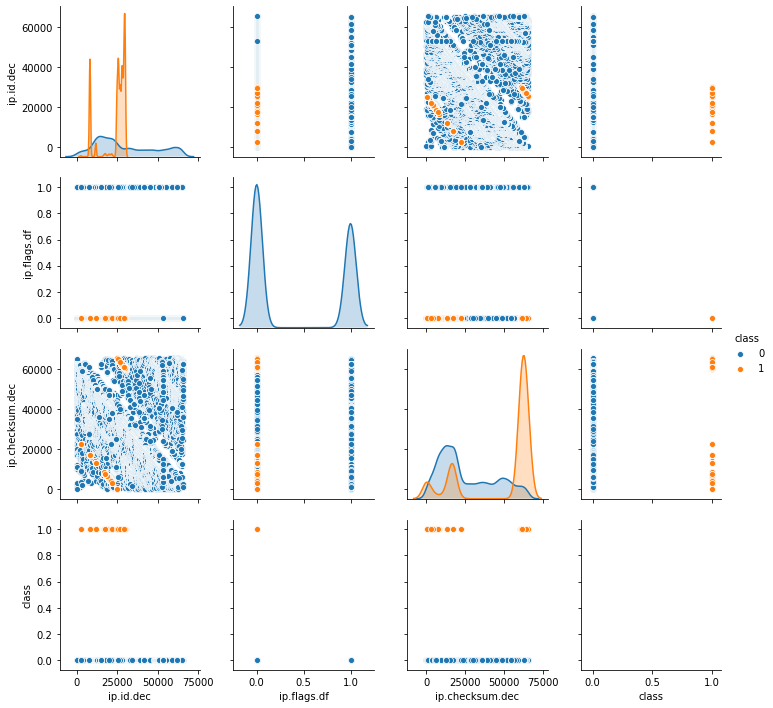

In [12]:
sns.pairplot(dataset, hue='class')

In [13]:
# Set the independent and dependent variables
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [14]:
# View the independent variables
X.head()

,ip.id.dec,ip.flags.df,ip.checksum.dec
0,19456,0,5572
1,28416,0,62147
2,29184,0,61379
3,25856,0,64707
4,27904,0,62659


In [15]:
# Class
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [16]:
# Split the dataset into training and testing sets
# Stratify it so there is equal number of packets in the two classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [17]:
# Check the size the datasets
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(75298, 3)
(25100, 3)

(75298,)
(25100,)


In [18]:
# Scale the variables for faster computation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Import the necessary modules to build the voting classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression()
nb = GaussianNB()
svm = SVC(kernel='rbf', gamma='auto')
classifier = VotingClassifier(estimators=[('lr', lr), ('nb', nb), ('svm', svm)], voting='hard')
classifier.fit(X_train, y_train)

C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('svm',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_sh

In [20]:
# Predict the test data
y_predict = classifier.predict(X_test)
print(y_predict)

[1 1 0 ... 1 1 1]


In [21]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model score
score = classifier.score(X_test, y_test)
print(score, '%')

# Accuracy using the accuracy_score function from the sklearn.metrics
score = accuracy_score(y_test, y_predict)
print(score, '%')

# The quality of the predictions being made
report = classification_report(y_test, y_predict)
print(report)

# The confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

0.8735458167330677 %
0.8735458167330677 %
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     12550
           1       0.80      1.00      0.89     12550

    accuracy                           0.87     25100
   macro avg       0.90      0.87      0.87     25100
weighted avg       0.90      0.87      0.87     25100

[[ 9376  3174]
 [    0 12550]]


In [22]:
# Accuracy can be misleading
# Try the KFold cross validation
from sklearn.model_selection import cross_validate
scores = cross_validate(classifier, X, y,cv=10, return_train_score=True, n_jobs=-1)
print(f'KFold cross validation scores: {scores}')
avg = np.average(scores['test_score'])
print(f'Average score is {avg}')
print()

KFold cross validation scores: {'fit_time': array([1054.04150271, 1062.73344755, 1068.82936764, 1068.7214973 ,
       1065.01343012, 1118.55919647, 1064.10114479,  771.50941753,
        785.06229448,  653.85439968]), 'score_time': array([31.97072816, 33.24204469, 33.95269561, 33.62555122, 31.78489089,
       34.50169444, 34.24789619, 30.77704072, 19.8394742 , 19.96256113]), 'test_score': array([0.93466135, 0.72450199, 0.91334661, 0.94511952, 0.80448207,
       0.8810757 , 0.937251  , 0.84830677, 0.85229084, 0.93604304]), 'train_score': array([0.872485  , 0.89435357, 0.87750946, 0.87478696, 0.8854335 ,
       0.88067465, 0.87602647, 0.88191416, 0.88429359, 0.87695883])}
Average score is 0.8777078893035153



In [26]:
# Covert packet 
observation = [[19456, 5572, 64]]
scaled_observation = scaler.transform(observation)
print(scaled_observation)
print(classifier.predict(scaled_observation))

[[-5.33624543e-01  1.36775034e+04 -1.58449712e+00]]
[0]


In [27]:
# Print the score of each model
from sklearn.metrics import accuracy_score
for clf in (lr, nb, svm, classifier):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.8316334661354582
GaussianNB 0.7225498007968127
SVC 0.9945019920318725


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8735458167330677
